In [24]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [33]:
train = pd.read_csv("Train.csv")

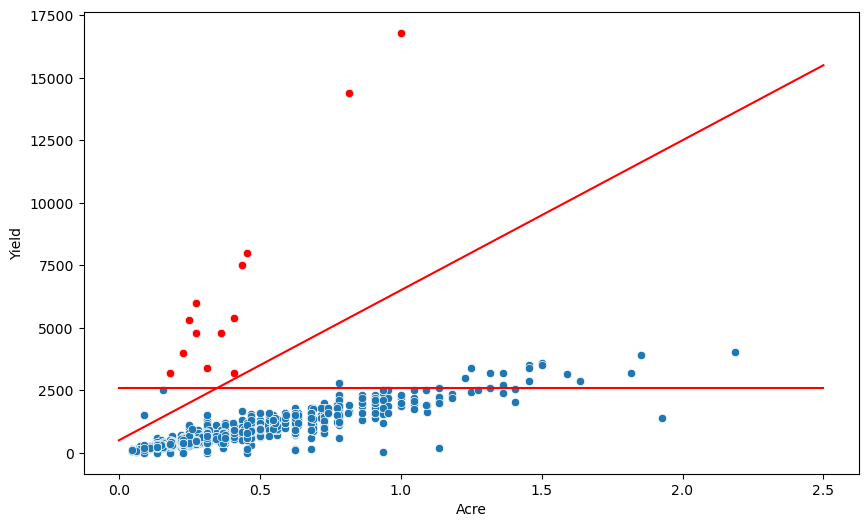

In [34]:
a = 6000
b = 500

def line(x):
    return a * x + b

_a = 0
_b = 2600

def _line(x):
    return _a * x + _b

over_line_df = train[(train['Yield'] >= train['Acre'].apply(line)) & (train['Yield'] > 2500)]

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Acre', y='Yield', data=train)
sns.scatterplot(x='Acre', y='Yield', data=over_line_df, color = 'red')

x = np.linspace(0, 2.5, 100)
y = line(x)

data = pd.DataFrame(data={'x': x, 'y': y})
sns.lineplot(x='x', y='y', data=data, color = 'red')

_x = np.linspace(0, 2.5, 100)
_y = _line(x)

_data = pd.DataFrame(data={'x': _x, 'y': _y})
sns.lineplot(x='x', y='y', data=_data, color = 'red')

plt.show()

As pointed out by several people in the discussion forum, these data points above the line seem to be data errors. Their Yield values seem to have been multiplied with 10. To 'remove' the outliers we divide those values by 10.

In [35]:
a = 6000
b = 500

def line(x):
    return a * x + b

over_line_df = train[(train['Yield'] >= train['Acre'].apply(line)) & (train['Yield'] > 2500)]
print(len(over_line_df))
mult_by_10_index = over_line_df.index
train.loc[mult_by_10_index, 'Yield'] = over_line_df.Yield / 10

19


<Axes: xlabel='Acre', ylabel='Yield'>

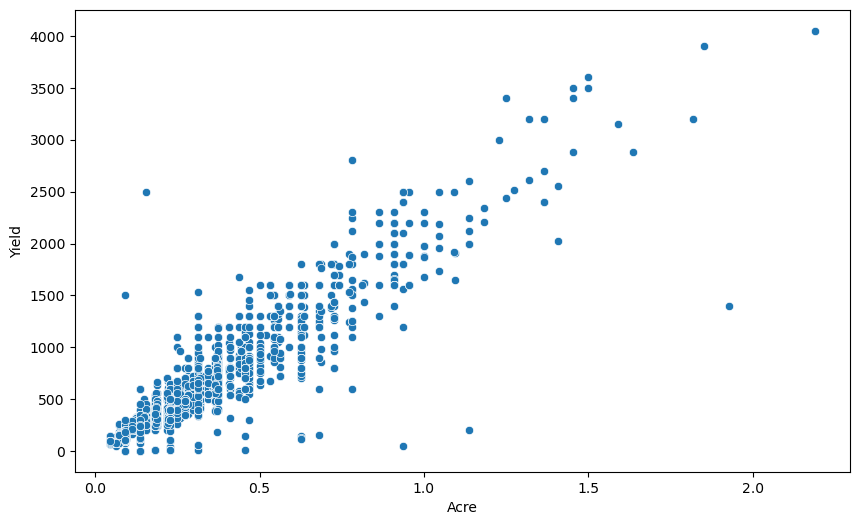

In [36]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Acre', y='Yield', data=train)